In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [48]:
%matplotlib notebook

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
import sympy as sm
from sympy.utilities.lambdify import lambdify, implemented_function, lambdastr

In [51]:
tf.__version__

'2.0.0'

M = y*(w0*1+w1*x1+w2*x2)

In [52]:
def compute_predictions(x, w):
    w = w.reshape(3,1)
    #return np.sign(np.matmul(x, w[1:]) + W[0])
    return np.sign(w[0]+w[1]*x[:,0]+w[2]*x[:,1])

In [53]:
def loss_f(w0,w1,w2, x1,x2, y):           
    return sm.log(1+sm.exp(-y*(w0+w1*x1+w2*x2)))

In [54]:
def compute_loss(w,x,y,loss_f):
    x1,x2,yy,sw1,sw2,sw3 = sm.symbols('x1 x2 yy sw1 sw2 sw3')
    comp_f = lambdify((sw1,sw2,sw3,x1,x2,yy), loss_f(sw1,sw2,sw3,x1,x2,yy))
    return np.sum(comp_f(w[0],w[1],w[2],x[:,0],x[:,1],y))/len(y)

In [55]:
def get_grad_func(loss_f):
    x1,x2,yy,sw1,sw2,sw3 = sm.symbols('x1 x2 yy sw1 sw2 sw3')
    f_dw0 = lambdify((sw1,sw2,sw3,x1,x2,yy), loss_f(sw1,sw2,sw3,x1,x2,yy).diff(sw1))
    f_dw1 = lambdify((sw1,sw2,sw3,x1,x2,yy), loss_f(sw1,sw2,sw3,x1,x2,yy).diff(sw2))
    f_dw2 = lambdify((sw1,sw2,sw3,x1,x2,yy), loss_f(sw1,sw2,sw3,x1,x2,yy).diff(sw3))
    return lambda w,x,y: (f_dw0(w[0],w[1],w[2],x[:,0],x[:,1],y),\
                          f_dw1(w[0],w[1],w[2],x[:,0],x[:,1],y),\
                          f_dw2(w[0],w[1],w[2],x[:,0],x[:,1],y))

In [56]:
def grad_loss(w, x, y, gradient_f):
    gd_steps = np.sum(np.array(gradient_f(w,x,y)), axis = 1)/len(y)
    return gd_steps

In [57]:
grad_loss(W, X, Y, get_grad_func(loss_f))

array([-0.37940052,  0.19064723,  0.38421372])

In [58]:
def GD(w,x,y,lr, stop, loss_f):
    i = 0
    func = get_grad_func(loss_f)
    while True:
        print(f'\nstep{i}')
        grad = grad_loss(w,x,y,func)
        i+=1        
        print(f'w = {w}')
        print(f'grad = {grad}')    
        w = w - lr*grad
        if abs(np.sum(grad)) < stop:
            break
    return w

In [59]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2 ,cluster_std=1, random_state=17, center_box=(-10, 10))
#нормализация
X[:,0] = 2 * (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min()) - 1
X[:,1] = 2 * (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min()) -1 
Y[Y == 0] = -1
W = np.array([10,10,10])

In [60]:
X_train = X[:80]
X_test = X[80:]
Y_train = Y[:80]
Y_test = Y[80:]

In [61]:
pred_w = GD(W,X_train,Y_train,0.5,0.05, loss_f)


step0
w = [10 10 10]
grad = [0.19987306 0.27711795 0.5130063 ]

step1
w = [9.90006347 9.86144102 9.74349685]
grad = [0.20650785 0.27517647 0.50799859]

step2
w = [9.79680955 9.72385279 9.48949756]
grad = [0.21306098 0.27321074 0.50302371]

step3
w = [9.69027905 9.58724742 9.2379857 ]
grad = [0.21951796 0.27122568 0.49809479]

step4
w = [9.58052007 9.45163457 8.9889383 ]
grad = [0.22586525 0.26922614 0.49322424]

step5
w = [9.46758745 9.3170215  8.74232618]
grad = [0.23209073 0.26721676 0.48842335]

step6
w = [9.35154209 9.18341312 8.49811451]
grad = [0.23818399 0.26520186 0.48370202]

step7
w = [9.23245009 9.0508122  8.2562635 ]
grad = [0.24413649 0.26318536 0.47906865]

step8
w = [9.11038185 8.91921951 8.01672918]
grad = [0.24994157 0.2611708  0.47453013]

step9
w = [8.98541106 8.78863412 7.77946411]
grad = [0.25559431 0.25916129 0.47009189]

step10
w = [8.85761391 8.65905347 7.54441817]
grad = [0.26109137 0.25715961 0.46575808]

step11
w = [8.72706822 8.53047367 7.31153913]
grad = [

In [62]:
pred_w

array([-0.49042041,  0.73528747, -5.42392008])

In [63]:
accuracy_score(Y_test,compute_predictions(X_test,pred_w))

1.0

In [64]:
def div_line(pred_w, x):
    return pred_w[2]*x/abs(pred_w[1]) + pred_w[0]/abs(pred_w[1])

<IPython.core.display.Javascript object>


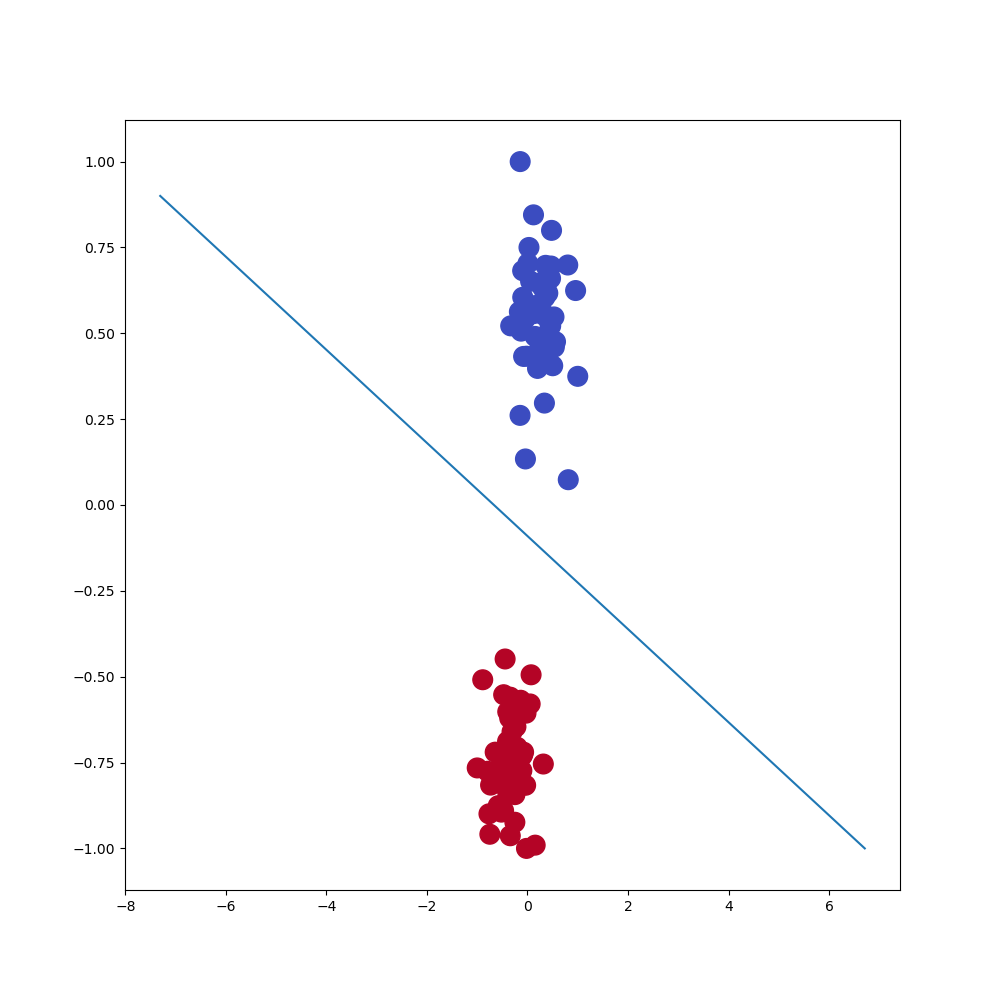

In [65]:
plt.figure(figsize=(10,10))
plt.plot(div_line(pred_w,np.arange(-1,1,0.1)), np.arange(-1,1,0.1))

plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=plt.cm.coolwarm)

plt.show()

### Задача 2. Реализация метода градиентного спуска
Постройте анимационную гифку схождения вашей линейной модели к данным. Подпишите loss к каждому кадру на гифке.

In [66]:
for j in range(0,len(Y),batch_size):                             
        new_W_b = new_W_b - lr*grad_loss(new_W_b,X[j:j+batch_size],Y[j:j+batch_size],grad_f)

In [67]:
grad_loss(new_W_sgd,X,Y,grad_f), grad_loss(new_W,X,Y,grad_f), 

(array([0.00464558, 0.01532328, 0.03694245]),
 array([0.0040544 , 0.0151478 , 0.03662539]))

<IPython.core.display.Javascript object>


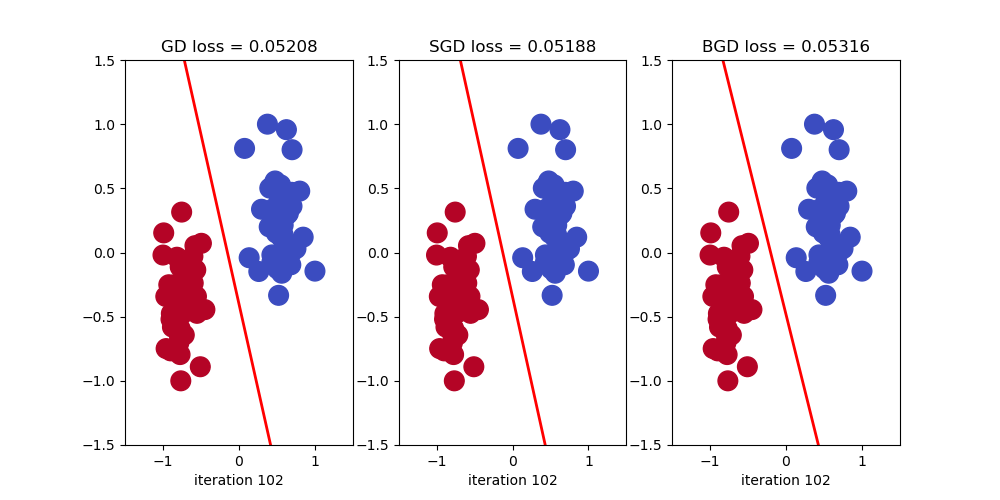

In [68]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig, axes = plt.subplots(1,3, figsize = (10,5))


clfs = []
for ax in axes:
    # Данные
    ax.scatter(X[:,1], X[:,0], s = 200, c = Y, cmap=plt.cm.coolwarm)
    # Настройка графика
    ax.set_xlim([X[:,0].min() - .5, X[:,0].max() + .5])
    ax.set_ylim([X[:,1].min() - .5, X[:,1].max() + .5])
    clfs.append(ax.plot([X[:,1].min() - .5, X[:,1].max() + .5],\
                  [-div_line(W,X[:,1].min() - .5), -div_line(W,X[:,1].min() - .5)],'r-', linewidth=2))

# Модели данных
clf_GD, = clfs[0]
clf_SGD, = clfs[1]
clf_BGD, = clfs[2]

        
#предварительные параметры
lr = 0.5
W = np.array([-2,1,0.1])
batch_size = 20
new_W = W.copy()
new_W_sgd = W
new_W_b = W
grad_f = get_grad_func(loss_f)
def update(i):
    global new_W_b, new_W_sgd, new_W, W, X, Y, grad_f, lr, batch_size
    label = 'iteration {0}'.format(i)
    
    #для обычного
    new_W = new_W - lr*grad_loss(new_W,X,Y,grad_f)
    
    #для стохастического
    data = np.hstack((X,Y.reshape(-1,1)))
    sample = data[sample_index(len(Y),batch_size)]
    new_W_sgd = new_W_sgd - lr*grad_loss(new_W_sgd,sample[:,:2],sample[:,2].astype('int'),grad_f)
    
    #для батч
    #for j in range(0,len(Y),batch_size):
    j = i if i < (len(Y)-batch_size) else 0    
    new_W_b = new_W_b - lr*grad_loss(new_W_b,X[j:j+batch_size],Y[j:j+batch_size],grad_f)
    

    clf_GD.set_ydata([div_line(new_W,X[:,0].min()), div_line(new_W,X[:,0].max())])
    clf_SGD.set_ydata([div_line(new_W_sgd,X[:,0].min()), div_line(new_W_sgd,X[:,0].max())])
    clf_BGD.set_ydata([div_line(new_W_b,X[:,0].min()), div_line(new_W_b,X[:,0].max())])
    
    axes[0].set_title(f'GD loss = {round(compute_loss(new_W,X,Y,loss_f),5)}')
    axes[0].set_xlabel(label)
    axes[1].set_title(f'SGD loss = {round(compute_loss(new_W_sgd,X,Y,loss_f),5)}')
    axes[1].set_xlabel(label)
    axes[2].set_title(f'BGD loss = {round(compute_loss(new_W_b,X,Y,loss_f),5)}')
    axes[2].set_xlabel(label)
    return clf_GD, clf_SGD, clf_BGD, axes,

anim = FuncAnimation(fig, update, frames=200, interval=10, blit=True, repeat = False)
rc('animation', html='html5')

### Задача 3. Реализация стохастического градиентного спуска.
Используйте на каждой итерации не весь набор данных, а $n$ случайных объектов из выборки. Оформите результат схождения вашей модели в виде гифки.

In [24]:
def sample_index(length,batch_size):
    ololo = list(set(np.random.choice(np.arange(length),batch_size)))
    while len(ololo) != batch_size:
        new_ind = np.random.randint(length)
        if not(new_ind in ololo): 
            ololo.append(new_ind)
    ololo.sort()
    return ololo

In [69]:
def SGD(w,x,y, lr, epochs, batch_size, loss_f):
    data = np.hstack((x,y.reshape(-1,1)))
    func = get_grad_func(loss_f)
    for epoch in range(epochs):
        sample = data[sample_index(len(y),batch_size)]
        x = sample[:,:2]
        y = sample[:,2].astype('int')
        print(f'\nstep{epoch}')
        grad = grad_loss(w,x,y,func)     
        print(f'w = {w}')
        print(f'grad = {grad}')    
        w = w - lr*grad
    return w

In [70]:
pred_w_sgd = SGD(W,X_train,Y_train, 0.5, 100, 50, loss_f)


step0
w = [-2.   1.   0.1]
grad = [-0.29434027  0.16079879  0.33515606]

step1
w = [-1.85282987  0.91960061 -0.06757803]
grad = [-0.30069987  0.19927165  0.3413878 ]

step2
w = [-1.70247993  0.81996478 -0.23827193]
grad = [-0.28453093  0.1936437   0.33138074]

step3
w = [-1.56021447  0.72314293 -0.4039623 ]
grad = [-0.26571303  0.18664295  0.31904569]

step4
w = [-1.42735795  0.62982146 -0.56348515]
grad = [-0.24458644  0.17833352  0.30456666]

step5
w = [-1.30506473  0.5406547  -0.71576848]
grad = [-0.22183814  0.16894787  0.28840502]

step6
w = [-1.19414566  0.45618077 -0.85997099]
grad = [-0.1984017   0.15885952  0.27123299]

step7
w = [-1.09494481  0.37675101 -0.99558748]
grad = [-0.17526985  0.14850735  0.25379616]

step8
w = [-1.00730989  0.30249734 -1.12248556]
grad = [-0.15330039  0.1383047   0.23676514]

step9
w = [-0.93065969  0.23334499 -1.24086813]
grad = [-0.13309399  0.12857235  0.22063718]

step10
w = [-0.86411269  0.16905881 -1.35118672]
grad = [-0.1149689   0.11951363


step90
w = [-0.54437958 -1.28514818 -4.06193083]
grad = [0.00339664 0.01439737 0.0297935 ]

step91
w = [-0.5460779  -1.29234687 -4.07682758]
grad = [0.00337996 0.01423324 0.02948963]

step92
w = [-0.54776788 -1.29946349 -4.0915724 ]
grad = [0.0033631  0.0140727  0.02919211]

step93
w = [-0.54944943 -1.30649984 -4.10616845]
grad = [0.00334609 0.01391564 0.02890073]

step94
w = [-0.55112248 -1.31345766 -4.12061882]
grad = [0.00332895 0.01376195 0.02861531]

step95
w = [-0.55278695 -1.32033863 -4.13492647]
grad = [0.0033117  0.01361152 0.02833566]

step96
w = [-0.5544428  -1.32714439 -4.1490943 ]
grad = [0.00329436 0.01346425 0.02806161]

step97
w = [-0.55608998 -1.33387651 -4.16312511]
grad = [0.00327695 0.01332004 0.027793  ]

step98
w = [-0.55772846 -1.34053653 -4.17702161]
grad = [0.0032595  0.0131788  0.02752965]

step99
w = [-0.5593582  -1.34712593 -4.19078643]
grad = [0.00324201 0.01304045 0.02727141]


In [71]:
pred_w_sgd

array([-0.56097921, -1.35364616, -4.20442214])

In [72]:
accuracy_score(Y_test,compute_predictions(X_test,pred_w_sgd))

1.0

<IPython.core.display.Javascript object>


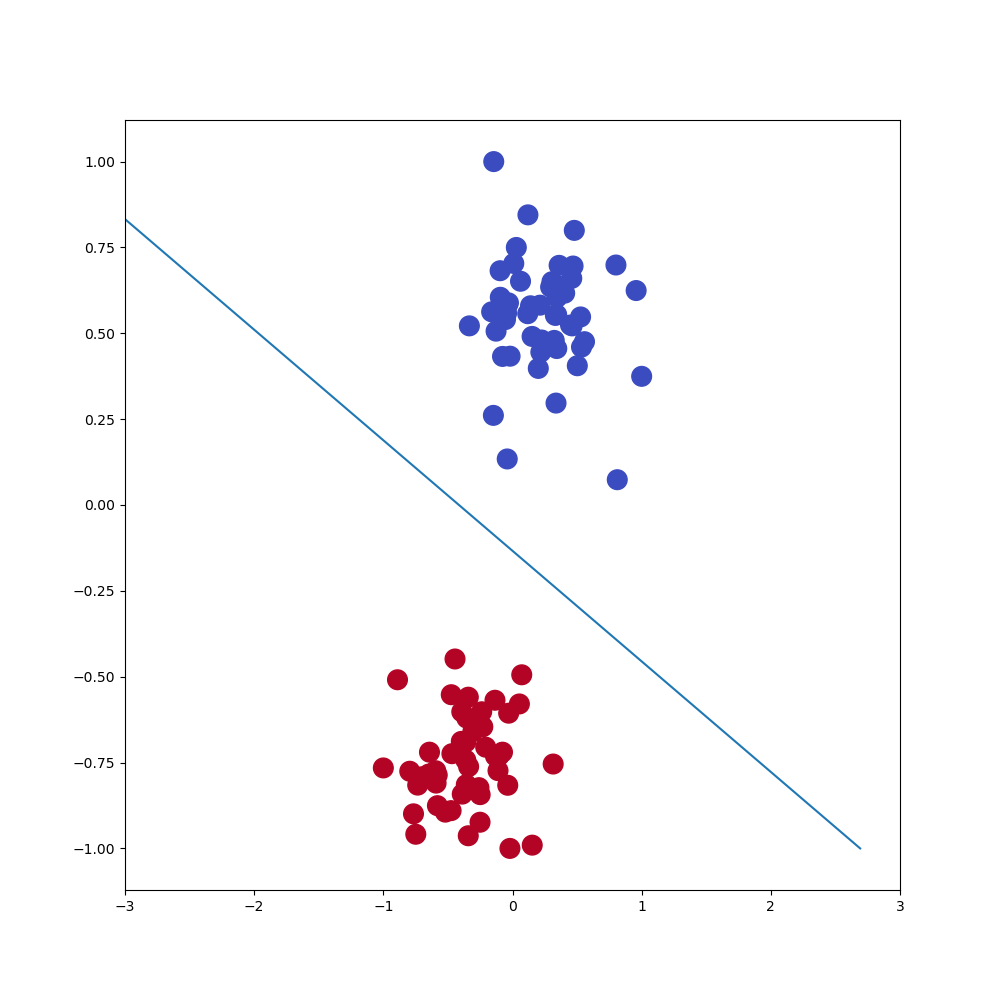

In [73]:
plt.figure(figsize=(10,10))
plt.plot(div_line(pred_w_sgd,np.arange(-1,1,0.1)), np.arange(-1,1,0.1))

plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=plt.cm.coolwarm)
plt.xlim(-3,3)
plt.show()

In [74]:
def GD_on_batch(w,x,y, lr, epochs, batch_size, loss_f):
    func = get_grad_func(loss_f)
    for epoch in range(epochs):
        print(f'\nstep{epoch}')
        for i in range(0,len(y),batch_size):                    
            grad = grad_loss(w,x[i:i+batch_size],y[i:i+batch_size],func)         
            w = w - lr*grad
            print(f'{i}-{i+batch_size}')
        print(f'w = {w}')
        print(f'grad = {grad}')
    return w

In [75]:
pred_w_batch = GD_on_batch(W, X_train, Y_train, 0.5, 100, 10, loss_f)


step0
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.82508875  0.32909672 -1.20529247]
grad = [-0.16971993  0.0982784   0.25031689]

step1
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.4327928  -0.05680602 -1.95858366]
grad = [-0.02972673  0.05173818  0.14096999]

step2
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.32788052 -0.2935584  -2.4421193 ]
grad = [0.00624271 0.03428739 0.09977962]

step3
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.30431139 -0.46305924 -2.80071591]
grad = [0.0166549  0.02556537 0.078679  ]

step4
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.30772703 -0.5948018  -3.08711974]
grad = [0.01980976 0.02027422 0.06559049]

step5
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.32099993 -0.70230043 -3.32612007]
grad = [0.02052605 0.01670558 0.05658696]

step6
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.33783897 -0.79291141 -3.53149717]
grad = [0.02034648 0.01413394 0.04998075]

step7
0-10
10-20
20-30
30-4

70-80
w = [-0.8448661  -2.08739408 -7.02963151]
grad = [0.00809465 0.00040467 0.0087855 ]

step74
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.84857888 -2.09409983 -7.05168687]
grad = [0.00804587 0.00038969 0.00870749]

step75
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.85225201 -2.10070831 -7.07347838]
grad = [0.00799793 0.00037517 0.00863127]

step76
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.85588642 -2.10722217 -7.09501267]
grad = [0.0079508  0.0003611  0.00855677]

step77
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.85948301 -2.11364394 -7.1162961 ]
grad = [0.00790447 0.00034745 0.00848392]

step78
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.86304265 -2.11997607 -7.13733481]
grad = [0.00785889 0.00033421 0.00841268]

step79
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.86656619 -2.1262209  -7.1581347 ]
grad = [0.00781406 0.00032136 0.00834298]

step80
0-10
10-20
20-30
30-40
40-50
50-60
60-70
70-80
w = [-0.87005442 -2.1

In [34]:
pred_w_sgd, pred_w, pred_w_batch

(array([-0.56092246, -1.35284472, -4.20547693]),
 array([-0.49042041,  0.73528747, -5.42392008]),
 array([-0.93052431, -2.23572823, -7.53147242]))

In [76]:
accuracy_score(Y_test,compute_predictions(X_test,pred_w_batch))

1.0

<IPython.core.display.Javascript object>


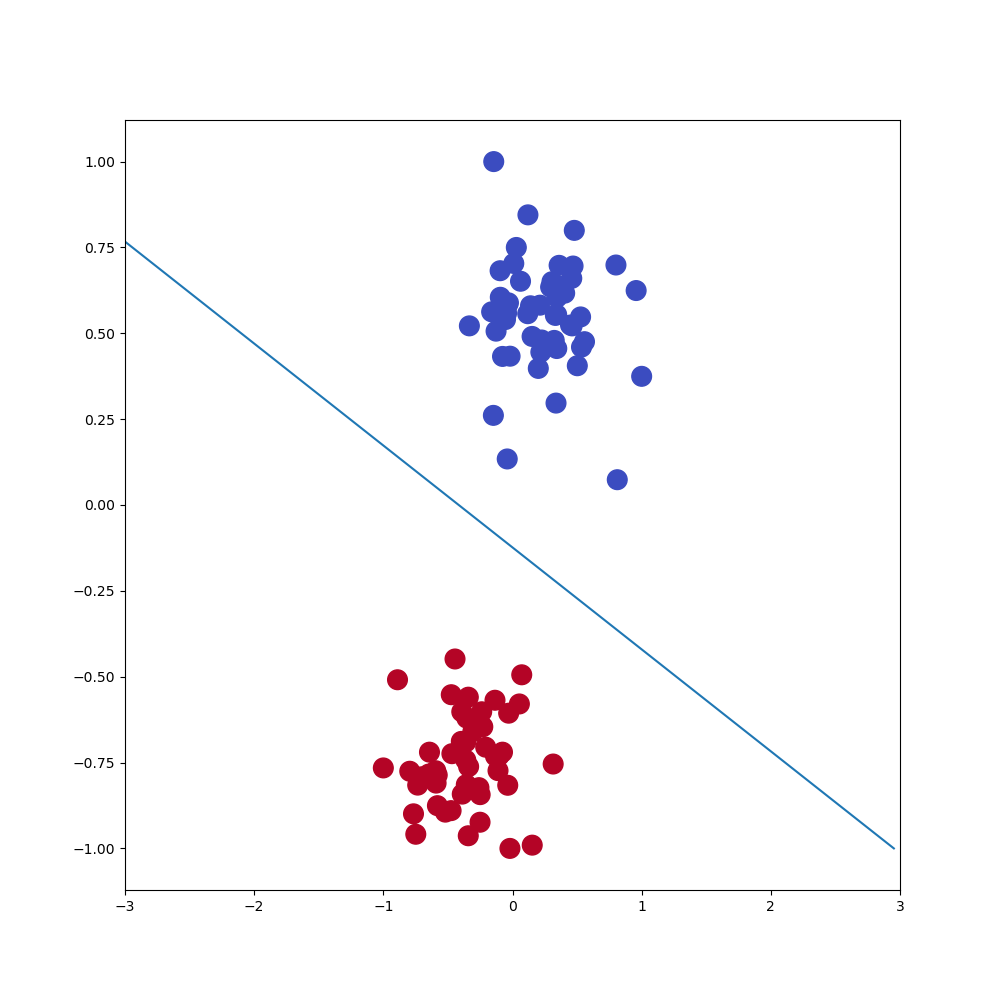

In [77]:
plt.figure(figsize=(10,10))
plt.plot(div_line(pred_w_batch,np.arange(-1,1,0.1)), np.arange(-1,1,0.1))

plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=plt.cm.coolwarm)
plt.xlim(-3,3)
plt.show()